## <u><font color=blue> Predicting the Prices of Houses in Banglore </font><u>

In [112]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

%matplotlib inline 

sns.set_style('white')

## <u><strong> Importing Data </strong></u>

In [113]:
train=pd.read_csv("Train.csv")

test=pd.read_csv("Test.csv")

In [114]:
## Making Copy of the data 

df=train.copy()

df1=test.copy()

## <u><strong> Data analysis and Processing</u>

In [115]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [117]:
print(f'Number of Features : {df.shape[1]}')

Number of Features : 9


In [118]:
print(f'Number of Records in Train : {df.shape[0]}')
print(' ')
print(f'Number of Records in Test : {df1.shape[1]}')

Number of Records in Train : 13320
 
Number of Records in Test : 9


In [119]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [120]:
def explain(df):
    d={}
    l=[]
    l1=[]
    for i in df.columns:
        d[i]=df[i].unique()
        l.append(df[i].nunique())
        l1.append(df[i].isna().sum())
        
    explain_df=pd.DataFrame(data=d.items(),columns=['features','unique_items'])
    
    explain_df['no_of_unique_items']=pd.Series(l)
    explain_df['no_of_missing_items']=pd.Series(l1)
    
    explain_df['%_of_missing_items']=round((explain_df['no_of_missing_items']/len(df))*100,2)
    
    return explain_df

In [121]:
explain(df)

,features,unique_items,no_of_unique_items,no_of_missing_items,%_of_missing_items
0,area_type,"[Super built-up Area, Plot Area, Built-up A...",4,0,0.00
1,availability,"[19-Dec, Ready To Move, 18-May, 18-Feb, 18-Nov...",81,0,0.00
2,location,"[Electronic City Phase II, Chikka Tirupathi, U...",1305,1,0.01
3,size,"[2 BHK, 4 Bedroom, 3 BHK, 4 BHK, 6 Bedroom, 3 ...",31,16,0.12
4,society,"[Coomee , Theanmp, nan, Soiewre, DuenaTa, Jaad...",2688,5502,41.31
5,total_sqft,"[1056, 2600, 1440, 1521, 1200, 1170, 2732, 330...",2117,0,0.00
6,bath,"[2.0, 5.0, 3.0, 4.0, 6.0, 1.0, 9.0, nan, 8.0, ...",19,73,0.55
7,balcony,"[1.0, 3.0, nan, 2.0, 0.0]",4,609,4.57
8,price,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ...",1994,0,0.00


In [122]:
explain(df1)

,features,unique_items,no_of_unique_items,no_of_missing_items,%_of_missing_items
0,area_type,"[Super built-up Area, Plot Area, Built-up A...",4,0,0.00
1,availability,"[Ready To Move, 18-Apr, 18-Dec, 18-Jul, 19-Dec...",51,0,0.00
2,location,"[Brookefield, Akshaya Nagar, Hennur Road, Kodi...",495,0,0.00
3,size,"[2 BHK, 9 Bedroom, 4 Bedroom, 3 BHK, 4 BHK, 1 ...",21,2,0.14
4,society,"[Roeekbl, nan, Saandtt, Winerri, AmageSa, G ac...",594,626,42.30
5,total_sqft,"[1225, 2400, 1650, 1322, 1161, 760, 4500, 960,...",666,0,0.00
6,bath,"[2.0, 9.0, 5.0, 3.0, 4.0, 6.0, 10.0, 1.0, 7.0,...",11,7,0.47
7,balcony,"[2.0, 1.0, 0.0, nan, 3.0]",4,69,4.66
8,price,[nan],0,1480,100.00


### Size 

In [123]:
df['size'].fillna(value=0,inplace=True)

df1['size'].fillna(value=0,inplace=True)

In [124]:
df['size']=df['size'].apply(lambda x:str(x)[0])

df1['size']=df1['size'].apply(lambda x:str(x)[0])

In [125]:
df['size']=pd.to_numeric(df['size'])

df1['size']=pd.to_numeric(df1['size'])

### Availability

In [126]:
def avail(x):
  if x!='Ready To Move':
    return 'Not Ready'
  else:
    return x

In [127]:
df['availability']=df['availability'].apply(avail)

df1['availability']=df1['availability'].apply(avail)

### Total Sqft

In [128]:
df['total_sqft'].fillna(value='0',inplace=True)

df1['total_sqft'].fillna(value='0',inplace=True)

In [129]:
for i in df['total_sqft'].unique():
  print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
1330.74
970
1459
800
869
1270
1670
2010
1185
1600
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
1665
708
1060
710
1450
2894
1330
2502
650
2400
1007
966
1630
1640
782
1260
1413
1116
1530
3700
2497
1436
276
1427
2061
3067 - 8156
2650
1282
1050
945
950
1870
880
1535
1360
1042 - 1105
1280
5000
3050
1563.05
1167
4000
1828
890
1612
1034
1710
957
2795
1125
1735
2050
3750
1063
1904
4200
2000
1145 - 1340
1425
1470
1300
450
1152
1550
400
705
770
1242
1700
2144
1704
1846
1340
1015 - 1540
1327
1186
1783
1400
980
1285
912
1225
1909
1359
1207
1736
2850
1595
1798
1475
1580
1295
3600
589
1415
1787
984
1520 - 1740
2405
1080
1900
805
1153
1148
1110
1933
3500
645
1644
910
1577
4050
2420
900
1108
30

 ### types of Data in total_sqft:
 
 * Sq. Yards = 9 sqft
 * Guntha = 1,089 sq ft
 * Sq. Meter =10.76 sqft
 * Acres = 43560 sqft
 * Grounds = 2400 sqft
 * Perch = 272.25 sqft
 * Cents = 435.56 sqft
 * a-b 
 * a

In [130]:
def unit_conversion(x):
  if 'Meter' in x:
    x=x.split(" ")
    return float(x[0][:-3])*10.76
  elif 'Yards'in x:
    x=x.split(" ")
    return float(x[0][:-3])*9
  elif 'Acres' in x:
    return float(x[:-5])*43560
  elif 'Perch' in x:
    return float(x[:-5])*272.25
  elif 'Cents' in x:
    return float(x[:-5])*435.56
  elif 'Guntha' in x:
    return float(x[:-6])*1089
  elif 'Grounds' in x:
    return float(x[:-7])*2400
  else:
    return x


In [131]:
df['total_sqft']=df['total_sqft'].apply(unit_conversion)

df1['total_sqft']=df1['total_sqft'].apply(unit_conversion)

In [132]:
def sqft(x):
  l=str(x).split("-")
  if len(l)>1:
    return (float(l[0])+float(l[-1]))/2
  else:
    return x

In [133]:
df['total_sqft']=df['total_sqft'].apply(sqft)

df1['total_sqft']=df1['total_sqft'].apply(sqft)

In [134]:
df['total_sqft']=pd.to_numeric(df['total_sqft'])

df1['total_sqft']=pd.to_numeric(df1['total_sqft'])

### <u> Columns </u>

In [135]:
cat_cols=[col for col in df.columns if df[col].dtype=="O"]

num_cols=[col for col in df.columns if df[col].dtype!="O"]

In [136]:
print("_____________Categorical Columns______________")
print(f'Number of Categorical Columns: {len(cat_cols)}')
print(cat_cols)


_____________Categorical Columns______________
Number of Categorical Columns: 4
['area_type', 'availability', 'location', 'society']


In [137]:
print("_____________Numerical Columns______________")
print(f'Number of Categorical Columns: {len(num_cols)}')
print(num_cols)


_____________Numerical Columns______________
Number of Categorical Columns: 5
['size', 'total_sqft', 'bath', 'balcony', 'price']


### <u>Price<u>

In [138]:
hi_price=df['price'].max()

In [139]:
for i in df.columns:
  xx=df[df['price']==hi_price][i]
  print(f'{i} for Heighest Price:{xx.values}')
  print(" ")


area_type for Heighest Price:['Plot  Area']
 
availability for Heighest Price:['Ready To Move']
 
location for Heighest Price:['Defence Colony']
 
size for Heighest Price:[1]
 
society for Heighest Price:[nan]
 
total_sqft for Heighest Price:[7150.]
 
bath for Heighest Price:[13.]
 
balcony for Heighest Price:[nan]
 
price for Heighest Price:[3600.]
 


In [140]:
low_price=df['price'].min()

In [141]:
for i in df.columns:
  xx=df[df['price']==low_price][i]
  print(f'{i} for Lowest Price:{xx.values}')
  print(" ")


area_type for Lowest Price:['Super built-up  Area']
 
availability for Lowest Price:['Ready To Move']
 
location for Lowest Price:['Yelahanka New Town']
 
size for Lowest Price:[1]
 
society for Lowest Price:['KHatsFl']
 
total_sqft for Lowest Price:[284.]
 
bath for Lowest Price:[1.]
 
balcony for Lowest Price:[1.]
 
price for Lowest Price:[8.]
 


### <u> Percentage Distribution Of categories </u>

In [142]:
for i in cat_cols:
  print(f'_________Percetage Distribution of {i}_________')
  xx=df[i].value_counts(normalize=True).sort_values(ascending=False)
  print(round(xx*100,2))
  print(' ')

_________Percetage Distribution of area_type_________
Super built-up  Area    65.99
Built-up  Area          18.15
Plot  Area              15.20
Carpet  Area             0.65
Name: area_type, dtype: float64
 
_________Percetage Distribution of availability_________
Ready To Move    79.44
Not Ready        20.56
Name: availability, dtype: float64
 
_________Percetage Distribution of location_________
Whitefield          4.05
Sarjapur  Road      3.00
Electronic City     2.27
Kanakpura Road      2.05
Thanisandra         1.76
                    ... 
pavitra paradise    0.01
Somanna Garden      0.01
 Banaswadi          0.01
Medaralli           0.01
Abshot Layout       0.01
Name: location, Length: 1305, dtype: float64
 
_________Percetage Distribution of society_________
GrrvaGr    1.02
PrarePa    0.97
Sryalan    0.75
Prtates    0.75
GMown E    0.72
           ... 
Sashaa     0.01
Vaontos    0.01
Saa 2Ai    0.01
Ocuil T    0.01
RSntsAp    0.01
Name: society, Length: 2688, dtype: float64
 


## <u> Correlation </u>

In [143]:
corr_matrix=df.corr()

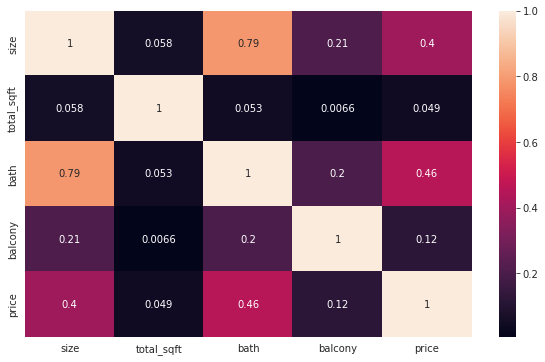

In [144]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)

* **Size** and **Balcony** are Highly correlated 

## <u> Dealing with Null Values </u>

In [145]:
df[df['size']==0]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Not Ready,Sarjapur Road,0,Asiss B,1800.0,NaN,NaN,34.185
1775,Plot Area,Not Ready,IVC Road,0,Orana N,3817.0,NaN,NaN,124.000
2264,Plot Area,Not Ready,Banashankari,0,NaN,2400.0,NaN,NaN,460.000
2809,Plot Area,Not Ready,Sarjapur Road,0,AsdiaAr,1800.0,NaN,NaN,28.785
2862,Plot Area,Not Ready,Devanahalli,0,Ajleyor,1950.0,NaN,NaN,46.800
5333,Plot Area,Not Ready,Devanahalli,0,Emngs S,3752.5,NaN,NaN,177.115
6423,Plot Area,Not Ready,Whitefield,0,SRniaGa,2324.0,NaN,NaN,26.730
6636,Plot Area,Not Ready,Jigani,0,S2enste,1500.0,NaN,NaN,25.490
6719,Plot Area,Not Ready,Hoskote,0,SJowsn,1730.0,NaN,NaN,28.545
7680,Plot Area,Not Ready,Kasavanhalli,0,NaN,5000.0,NaN,NaN,400.000


In [146]:
df['size'].dropna(axis=0,inplace=True)
df['balcony'].dropna(axis=0,inplace=True)

df1['size'].dropna(axis=0,inplace=True)
df1['balcony'].dropna(axis=0,inplace=True)


In [147]:
df['balcony'].mode()

0    2.0
dtype: float64

In [148]:
df['balcony'].fillna(value=2.0,inplace=True)

df1['balcony'].fillna(value=2.0,inplace=True)

In [149]:
df['Total_rooms']=df['size']+df['balcony']+df['bath']

df1['Total_rooms']=df['size']+df['balcony']+df['bath']

In [150]:
df.drop(labels=['size','balcony','bath'],axis=1,inplace=True)

df1.drop(labels=['size','balcony','bath'],axis=1,inplace=True)

### <u> Ouliers </u>

In [151]:
def limits(x):
  q3=np.percentile(df[x],75)
  q1=np.percentile(df[x],25)

  IQR=q3-q1

  up_lim=q3+(IQR*1.5)

  low_lim=q1-(IQR*1.5)

  return low_lim,up_lim



In [152]:
l_price,u_price=limits('price')

In [153]:
u_price,l_price

(225.0, -55.0)

In [154]:
df[(df['price']>u_price) | (df['price']<l_price)]

,area_type,availability,location,society,total_sqft,price,Total_rooms
7,Super built-up Area,Ready To Move,Rajaji Nagar,Brway G,3300.0,600.0,10.0
9,Plot Area,Ready To Move,Gandhi Bazar,NaN,1020.0,370.0,14.0
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,295.0,12.0
18,Super built-up Area,Ready To Move,Ramakrishnappa Layout,PeBayle,2770.0,290.0,9.0
22,Plot Area,Ready To Move,Thanisandra,Soitya,2800.0,380.0,11.0
...,...,...,...,...,...,...,...
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,NaN,1200.0,325.0,11.0
13311,Plot Area,Ready To Move,Ramamurthy Nagar,NaN,1500.0,250.0,18.0
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,231.0,9.0
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,400.0,11.0


In [155]:
df['price']=np.where(df['price']>u_price,u_price,
                     np.where(
                         df['price']<l_price,
                         l_price,df['price']
                     ))

In [156]:
l_pft,u_pft=limits('total_sqft')

In [157]:
l_pft,u_pft

(230.0, 2550.0)

In [158]:
df['total_sqft']=np.where(df['total_sqft']>u_pft,u_pft,
                     np.where(
                         df['total_sqft']<l_pft,
                         l_pft,df['total_sqft']
                     ))

## <u><strong> Data Vizualization </strong></u>

### <u>Most Frequent</u>

In [159]:
for i in ['location','society']:
  gp=df[i].value_counts().sort_values(ascending=False).head(20)

  fig=px.bar(gp,title=f'Top 20 Most Frequent Category in {i}',color='value')

  fig.show()

### <u>Least Frequent</u>

In [160]:
for i in cat_cols:
  gp=df[i].value_counts().sort_values(ascending=True).head(20)

  fig=px.bar(gp,title=f'Top 20 Least Frequent Category in {i}',color='value')

  fig.show()

### <u> Price </u>

Text(0.5, 1.0, 'Distribution of Price')

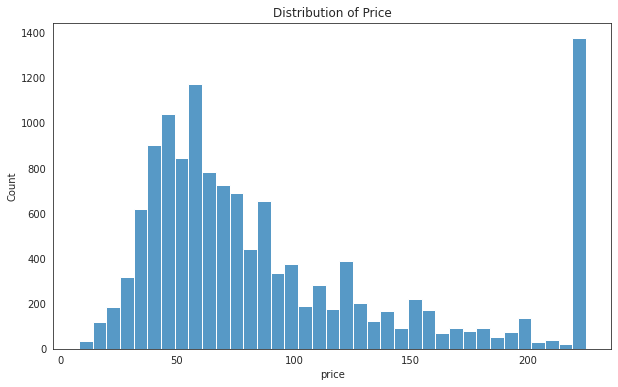

In [161]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price')
plt.title('Distribution of Price')

### <u>Category with Heighest Mean Price</u>

In [162]:
for i in cat_cols:
  gp=df.groupby(i)['price'].mean().sort_values(ascending=False).head(20)

  fig=px.bar(gp,title=f'Top 20 Categories in {i} with Heighest mean Price',color='value')

  fig.show()

### <u>Category with Lowest Mean Price</u>

In [163]:
for i in ['location','society']:
  gp=df.groupby(i)['price'].mean().sort_values(ascending=True).head(20)

  fig=px.bar(gp,title=f'Top 20 Categories in {i} with Heighest mean Price',color='value')

  fig.show()

### <u> Trend of Price with Numerical Columns </u>

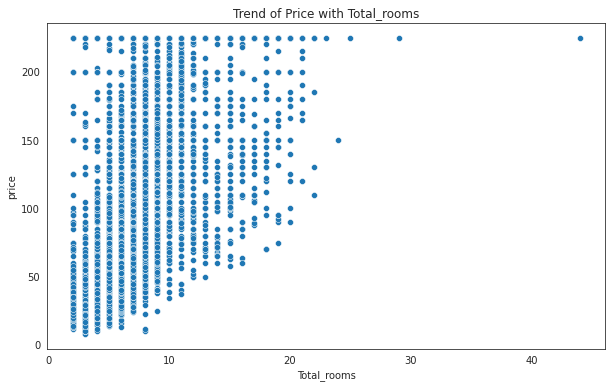

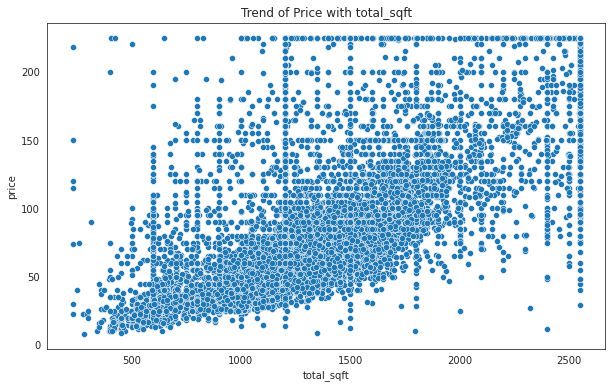

In [164]:
for i in ['Total_rooms','total_sqft']:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=i,y='price',data=df)
  plt.title(f'Trend of Price with {i}')

## <u> Feature Engineering </u>

In [165]:
df.drop(['society'],axis=1,inplace=True)

df1.drop(['society'],axis=1,inplace=True)

* **42%** of the records were Missing

In [166]:
df.head()

,area_type,availability,location,total_sqft,price,Total_rooms
0,Super built-up Area,Not Ready,Electronic City Phase II,1056.0,39.07,5.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2550.0,120.00,12.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,62.00,8.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,95.00,7.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,51.00,5.0


### <u> Spliting the Data </u>

In [167]:
X=df.drop('price',axis=1)

y=df['price']

In [168]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### <u> Feature Selection </u>

In [169]:
X_train

,area_type,availability,location,total_sqft,Total_rooms
3411,Super built-up Area,Ready To Move,Lingadheeranahalli,1530.0,7.0
9142,Super built-up Area,Ready To Move,Cooke Town,1310.0,6.0
1971,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,1530.0,8.0
2608,Plot Area,Ready To Move,Banashankari,2400.0,9.0
9635,Built-up Area,Not Ready,Kanakapura,1017.0,5.0
...,...,...,...,...,...
11964,Plot Area,Ready To Move,Varanasi,1200.0,10.0
5191,Super built-up Area,Not Ready,Kogilu,1559.0,8.0
5390,Super built-up Area,Ready To Move,Garudachar Palya,1060.0,5.0
860,Plot Area,Ready To Move,Raja Rajeshwari Nagar,1200.0,12.0


In [170]:
X_train_encoded=pd.get_dummies(X_train[['location','area_type','availability']])

In [171]:
from sklearn.feature_selection import SelectKBest,f_regression

In [172]:
Selector=SelectKBest(f_regression,k=10)

In [173]:
Selector.fit(X_train_encoded,y_train)

SelectKBest(score_func=<function f_regression at 0x7fda24347a70>)

In [174]:
feat_score=pd.DataFrame(data=Selector.scores_,columns=['feat_scores'],index=X_train_encoded.columns)

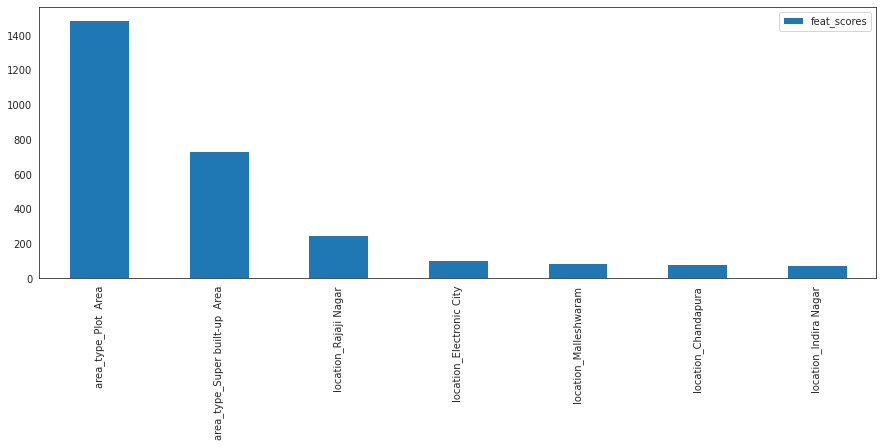

In [175]:
feat_score.sort_values(by='feat_scores',ascending=False).head(7).plot.bar(figsize=(15,5))


* **Area Type** has huge impact on Price Compared to **Location** .

* **Rajaji nagar, Electonic city, Malleshwaram, Chandapura and Indira Nagar** are top 5 Location .

In [176]:
def Loca(x):
  if x not in ['Rajaji Nagar','Electronic City','Malleshwaram',"Chandapura","Indira Nagar"]:
    return 'Others'
  else:
    return x

In [177]:
df['location']=df['location'].apply(Loca)

df1['location']=df1['location'].apply(Loca)

In [178]:
explain(df)

,features,unique_items,no_of_unique_items,no_of_missing_items,%_of_missing_items
0,area_type,"[Super built-up Area, Plot Area, Built-up A...",4,0,0.00
1,availability,"[Not Ready, Ready To Move]",2,0,0.00
2,location,"[Others, Rajaji Nagar, Electronic City, Chanda...",6,0,0.00
3,total_sqft,"[1056.0, 2550.0, 1440.0, 1521.0, 1200.0, 1170....",1567,0,0.00
4,price,"[39.07, 120.0, 62.0, 95.0, 51.0, 38.0, 204.0, ...",1716,0,0.00
5,Total_rooms,"[5.0, 12.0, 8.0, 7.0, 10.0, 14.0, 6.0, 9.0, 3....",26,73,0.55


In [179]:
df.describe()

,total_sqft,price,Total_rooms
count,13320.000000,13320.000000,13247.000000
mean,1431.803471,93.334921,7.071865
std,528.880455,59.709180,2.674777
min,230.000000,8.000000,2.000000
25%,1100.000000,50.000000,5.000000
50%,1277.250000,72.000000,7.000000
75%,1680.000000,120.000000,8.000000
max,2550.000000,225.000000,44.000000


### <u>Tranformers</u>

In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [181]:
transformer_dis=ColumnTransformer(transformers=[
                                            ('encoder',OneHotEncoder(drop='first',sparse=False),['location','area_type','availability']),
                                            ('scaler',StandardScaler(),['total_sqft','Total_rooms'])
],remainder="passthrough")

In [182]:
transformer=ColumnTransformer(transformers=[
                                            ('encoder',OneHotEncoder(drop='first',sparse=False),['location','area_type','availability'])
],remainder="passthrough")

In [183]:
df=df[df['Total_rooms'].notna()]

In [184]:
df1=df1[df1['Total_rooms'].notna()]

In [185]:
X=df.drop('price',axis=1)

y=df['price']

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [187]:
X_train.head()

,area_type,availability,location,total_sqft,Total_rooms
6283,Plot Area,Ready To Move,Others,1050.0,10.0
7002,Super built-up Area,Ready To Move,Others,1200.0,6.0
3602,Super built-up Area,Ready To Move,Others,1125.0,5.0
4150,Built-up Area,Ready To Move,Others,1157.0,4.0
1514,Built-up Area,Ready To Move,Others,980.0,5.0


## <u> Machine Learning </u>

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [190]:
def evaluate(y_pred):
  mse=mean_squared_error(y_test,y_pred)
  print(f"RMSE : {np.sqrt(mse)}")
  print(' ')
  r2=r2_score(y_test,y_pred)
  print(round(r2*100,2))

In [191]:
from sklearn import set_config

set_config(display="diagram")

### <u> Linear Regression </u>

In [192]:
pipe_lr=Pipeline([
                  ('transformer',transformer_dis),
                  ('lr',LinearRegression())
])

In [193]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft',
                                                   'Total_rooms'])])),
                ('lr', LinearRegression())])

In [194]:
y_pred_lr=pipe_lr.predict(X_test)

In [195]:
evaluate(y_pred_lr)

RMSE : 31.53877244624852
 
71.71


### <u> Ridge Regression </u>

In [196]:
pipe_ridge=Pipeline([
                     ('tranformer',transformer_dis),
                     ('ridge',Ridge())
])

In [197]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft',
                                                   'Total_rooms'])])),
                ('ridge', Ridge())])

In [198]:
y_pred_ridge=pipe_ridge.predict(X_test)

In [199]:
evaluate(y_pred_ridge)

RMSE : 31.540304347943724
 
71.71


### <u> Lasso Regression </u>

In [200]:
pipe_lasso=Pipeline([
                     ('transformer',transformer_dis),
                     ('lasso',Lasso())
])

In [201]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft',
                                                   'Total_rooms'])])),
                ('lasso', Lasso())])

In [202]:
y_pred_lasso=pipe_lasso.predict(X_test)

In [203]:
evaluate(y_pred_lasso)

RMSE : 32.67179146967901
 
69.64


### <u> Random Forest Regressor </u>

In [204]:
pipe_rf=Pipeline([
                  ('transformer',transformer),
                  ('rf',RandomForestRegressor())
])

In [205]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability'])])),
                ('rf', RandomForestRegressor())])

In [206]:
y_pred_rf=pipe_rf.predict(X_test)

In [207]:
evaluate(y_pred_rf)

RMSE : 30.79706957400461
 
73.03


### <u> Ada Boost Regressor </u>

In [208]:
pipe_ada=Pipeline([
                   ('tranformer',transformer),
                   ('Ada',AdaBoostRegressor())
])

In [209]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability'])])),
                ('Ada', AdaBoostRegressor())])

In [210]:
y_pred_ada=pipe_ada.predict(X_test)

In [211]:
evaluate(y_pred_ada)

RMSE : 36.804382534824725
 
61.48


### <u> XG Boost Regressor </u>

In [212]:
pipe_xgb=Pipeline([
                   ('transformer',transformer),
                   ('XGB',XGBRegressor())
])

In [213]:
pipe_xgb.fit(X_train,y_train)

[03:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['location', 'area_type',
                                                   'availability'])])),
                ('XGB', XGBRegressor())])

In [214]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [215]:
evaluate(y_pred_xgb)

RMSE : 29.013133665146746
 
76.06


### <font color='green'> By using **XGBREgressor** We got an Accuracy of **76%** </font>

In [216]:
prediction=pipe_xgb.predict(df1)

In [217]:
sol_df=pd.DataFrame(data=prediction,columns=['price'])

In [218]:
sol_df.head()

,price
0,64.094505
1,196.784531
2,127.211899
3,70.112785
4,53.591923


In [219]:
#from google.colab import files

#sol_df.to_csv('sol_df.csv')
#files.download('sol_df.csv')

In [220]:
import pickle 

pickle.dump(pipe_rf,open('HousePrice.pkl','wb'))

In [223]:
input_df=pd.DataFrame([{
    'area_type':'Built-up  Area',
    'availability':'Ready To Move',
    'location':'Malleshwaram',
    'total_sqft':400.0,
    'Total_rooms':4.0
}])

In [224]:
pipe_xgb.predict(input_df)

array([62.02431], dtype=float32)